In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Fixed point interation

In numerous applications, we encounter the task of solving equations of the form $$x = g(x)$$
for a continuous function $g$. In week 03 we saw one simple method to solve such problems: $$x_{t+1} = g(x_t)\,.$$
We solved two apparently similar equations $x = log(1+x)$ and $x = log(2+x)$, with showed very different convergence.

## Newton steps

This week's task is to adapt the iterative algorithm to use Newton-style steps. Like in the notebook of week 03, we can do this by expressing the update step as a gradient-descent update and computing its second derivative.



## Plot $g$

Let us see how the two functions look over an interval $[0,2]$.

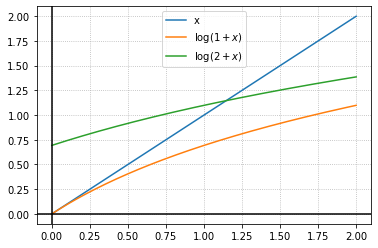

In [4]:
x = np.arange(0, 2, 0.0001)
y1 = np.log(1 + x)
y2 = np.log(2 + x)
fig = plt.figure()
plt.plot(x, x, label='x')
plt.plot(x, y1, label='$\log(1 + x)$')
plt.plot(x, y2, label='$\log(2 + x)$')
plt.grid(linestyle=':')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()

Please fill in the functions `fixed_point_newton` below:

In [ ]:
def fixed_point_newton(initial_x, max_iters, objective, objective_grad):
    """Compute the fixed point."""
    # Define parameters to store x and objective func. values
    xs = []
    errors = []
    x = initial_x
    for n_iter in range(max_iters):
        # compute objective and error
        obj = objective(x)
        error = np.abs(x - obj)
        # store x and error
        xs.append(x)
        errors.append(error)
        
        ########################
        # @TODO Insert your code here
        # UPDATE x with a Newton step
        # x = x - f_prime / f_second
        ########################

        
        # print the current error
        if n_iter % 10 == 0: 
            print("Fixed point: iteration ={i}, x = {x:.2e}, error={err:.2e}".format(i=n_iter, x=x, err=error))
    return errors, xs

def fixed_point(initial_x, max_iters, objective):
    """Compute the fixed point."""
    # Define parameters to store x and objective func. values
    xs = []
    errors = []
    x = initial_x
    for n_iter in range(max_iters):
        # compute objective and error
        obj = objective(x)
        error = np.abs(x - obj)
        # store x and error
        xs.append(x)
        errors.append(error)
        # update x 
        x = obj
        # print the current error
        if n_iter % 10 == 0: 
            print("Fixed point: iteration ={i}, x = {x:.2e}, error={err:.2e}".format(i=n_iter, x=x, err=error))
    return errors, xs

Let's test the implementations and compare it to the original algorithm from week 03:

In [ ]:
# Define the parameters of the algorithm.
max_iters = 100

# Initialization
initial_x = 1

# Run fixed point.
errors_func1, xs_func1 = fixed_point(
    initial_x, 
    max_iters, 
    lambda x: np.log(1 + x)
)

errors_func1_newton, xs_func1_newton = fixed_point_newton(
    initial_x, 
    max_iters, 
    lambda x: np.log(1 + x), 
    lambda x: 1./(1. + x)
)


Run your implementation on the second function

In [ ]:
# Define the parameters of the algorithm.
max_iters = 100

# Initialization
initial_x = 1

# Run fixed point.
errors_func2, xs_func2 = fixed_point(
    initial_x, 
    max_iters, 
    lambda x: np.log(2 + x)
)

errors_func2_newton, xs_func2_newton = fixed_point_newton(
    initial_x, 
    max_iters, 
    lambda x: np.log(2 + x), 
    lambda x: 1./(2. + x)
)


**Plotting error values**

In [ ]:
plt.semilogy()
plt.xlabel('Number of steps')
plt.ylabel('Value of Error')
#plt.yscale("log")
plt.plot(range(len(errors_func1)), errors_func1, label='$log(1 + x)$')
plt.plot(range(len(errors_func2)), errors_func2, label='$log(2 + x)$')
plt.plot(range(len(errors_func1_newton)), errors_func1_newton, label='$log(1 + x)$ (Newton)')
plt.plot(range(len(errors_func2_newton)), errors_func2_newton, label='$log(2 + x)$ (Newton)')

plt.legend()
plt.show()

What do you observe about the rates of convergence of the two methods? Can you explain this difference?